In [1]:
import seaborn as sns

In [85]:
import matplotlib.pyplot as plt

df = sns.load_dataset("mpg")

In [ ]:
df.drop(columns=["origin", "name", "model_year"], inplace=True)

In [10]:
x = df.drop(columns='mpg')
y = df['mpg']

In [20]:
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [21]:
lc = LinearRegression()
lg = LogisticRegressionCV(max_iter=1000)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42
)

In [24]:
lc_model = lc.fit(X_train,y_train)

In [27]:
lc_model.intercept_

np.float64(46.53236930249294)

In [30]:
lc_model.coef_

array([-0.26226222, -0.0019563 , -0.05984964, -0.00494017,  0.00403349])

In [32]:
pred = lc_model.predict(X_test)

In [35]:
mean_absolute_error(pred,y_test)

np.float64(3.678800137447887)

In [36]:
mean_squared_error(pred,y_test)

np.float64(19.71491709283737)

In [ ]:
# rmse
import numpy as np
np.sqrt(mean_squared_error(pred, y_test))

np.float64(4.440148318788165)

In [81]:
from sklearn.preprocessing import PowerTransformer
pc = PowerTransformer()

In [87]:
df['horsepower'] = pc.fit_transform(df[['horsepower']])

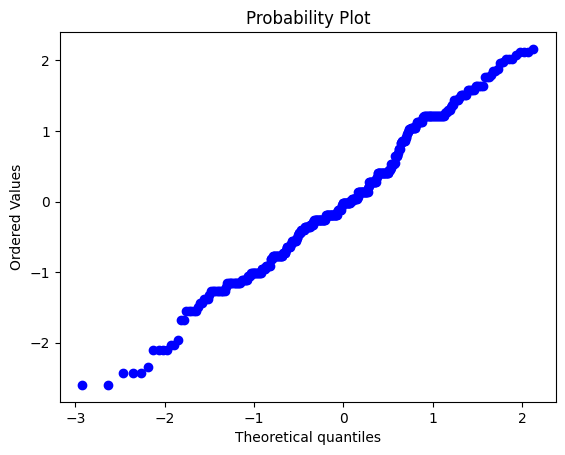

In [93]:
from scipy.stats import probplot
probplot(df['horsepower'],plot=plt)
plt.show()

np.float64(0.02706553891088631)

In [46]:
# from sklearn.metrics import accuracy_score
# accuracy_score(pred,y_test)

In [47]:
r2_score(pred,y_test)

0.5856633570327292

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
rf = RandomForestRegressor(n_estimators=300)

In [49]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
del lc_model
lc_model = lc.fit(X_train,y_train)
rf_model = rf.fit(X_train,y_train)

In [50]:
lc_pred = lc_model.predict(X_test)
rf_pred = rf.predict(X_test)

In [55]:
r2_score(lc_pred,y_test), r2_score(rf_pred,y_test)

(0.5856633570327294, 0.6524878157792084)

In [57]:
mean_absolute_error(lc_pred,y_test), mean_absolute_error(rf_pred,y_test)

(np.float64(3.67880013744789), np.float64(3.0937679487179515))

In [65]:
adjusted = (1 - ((1 - r2_score(rf_pred, y_test))*(df.shape[0] - 1)) / ((df.shape[0] - 1 - x.shape[1])))

In [99]:
transactions_list = [
    # Valid transactions
    {"account": "A001", "amount": 1200.75, "date": "2024-12-10"},
    {"account": "A002", "amount": 250.00, "date": "2024-12-10"},
    
    # Invalid transactions
    {"account": "A003", "amount": "not_a_number", "date": "2024-12-10"},  # Invalid amount
    {"account": "A004", "amount": 500.50, "date": "invalid_date"},         # Invalid date
    {"amount": 300.00, "date": "2024-12-10"},                             # Missing account
    {"account": "A006", "amount": 700, "date": None},                     # Missing date
    {"account": None, "amount": 400.00, "date": "2024-12-10"},            # Missing account value
    
    # Valid transactions
    {"account": "A007", "amount": 150.00, "date": "2024-12-10"},
]


def ProcessTransactions(transaction_list):
    summary = []
    for i in transaction_list:
        try:
            if 'amount' not in i:
                summary.append(f"{i.get('account')} has no amount key")
                continue
            if not isinstance(i['amount'],(int,float)):
                summary.append(f"{i.get('account')} has invalid amount !!")
                continue
            if 'date' not in i:
                summary.append(f"{i.get('account')} has no Date key")
                continue
            if i.get('date') is None:
                summary.append(f"{i.get('account')} has No Date Value")
                continue
            if not len(i.get('date').split('-')[0]) == 4:
                summary.append(f"{i.get('account')} has no invalid date format")
                continue
        except Exception as e:
            summary.append(f"{e} error occured")
    return summary


print(" ".join(ProcessTransactions(transactions_list)))

A003 has invalid amount !! A004 has no invalid date format A006 has No Date Value
